# Titanic 생존자 예측

# 1. 데이터 분석
 - pandas 라이브러리와 seaborn 라이브러리를 사용해서 데이터들을 데이터프레임에 넣고 해당 데이터를 seaborn을 통해서 확인
 - 결측치와 예측에 사용 되지 못할 문자열 데이터 column을 삭제.
 - heatmap을 통해서 각 데이터끼리의 상관관계를 확인.

##### 라이브러리 및 데이터셋

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
titanic_dataset = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA
 - 학습 데이터는 모두 891개의 데이터를 가지고 있다.
 - 생존 여부, 객실 등급, 이름, 성별, 나이, 동승 가족들, 티켓 번호, 요금, 탑승한 항구의 11개 데이터

In [3]:
# 타이타닉 데이터셋이 가지고 있는 데이터 내용
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 생존자 그래프

survive: 549


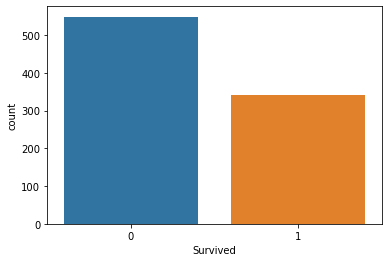

In [4]:

sns.countplot(x='Survived', data=titanic_dataset)
live = titanic_dataset.Survived.value_counts()[0]
print('survive: ' + str(live))

### 성별에 따른 생존자

C:\Users\marka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

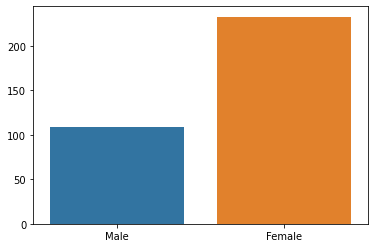

In [5]:
gender_labels = ["Male", "Female"]
gender_survived = [len(titanic_dataset[(titanic_dataset.Survived == 1) & (titanic_dataset.Sex == 'male')]), len(titanic_dataset[(titanic_dataset.Survived == 1) & (titanic_dataset.Sex == 'female')])]
sns.barplot(gender_labels, gender_survived)

### 객실의 등급에 따른 생존자 숫자

<AxesSubplot:xlabel='Survived', ylabel='count'>

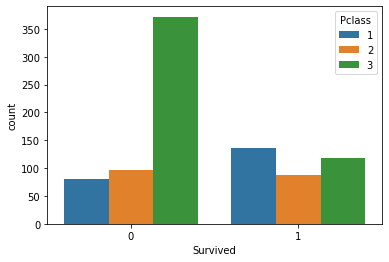

In [6]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_dataset)

### 가족 동승자 관련 생존자 숫자

 - 동승한 가족의 숫자를 나타내기 때문에 해당 수치의 크기는 생존의 여부와 큰 관계를 보이기 힘들다.
 - 가족의 숫자의 총합의 평균을 나타낸 것인데 큰 연관성이 보이지 않는다.

In [7]:
# 가족 동승자 숫자의
titanic_dataset[['Survived', 'SibSp', 'Parch']].groupby('Survived').mean()

,SibSp,Parch
Survived,,
0,0.553734,0.329690
1,0.473684,0.464912


In [8]:
# embarked 데이터 값 변환
# Cherbourg = 1, Queenstown = 2, Southampton = 3

corr = titanic_dataset.drop(['PassengerId'], axis=1)

corr['Sex'] = corr['Sex'].map({'male':0, 'female':1})
corr['Embarked'] = corr['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

In [9]:
# 문자열 데이터 삭제
# 데이터프레임에서 완전히 삭제하는 것이기 때문에 *해당 셀은 한 번만 실행*하고 다시 실행하지 않음.
corr.drop(["Name"], axis=1, inplace=True)
corr.drop(['Ticket'], axis=1, inplace=True)
corr.drop(['Cabin'], axis=1, inplace=True)

### 상관관계도

<AxesSubplot:>

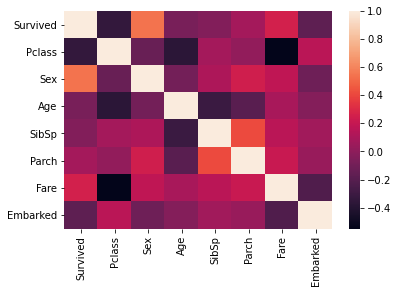

In [10]:
# 상관관계를 히트맵으로 표현.
heat_data = corr.corr()
sns.heatmap(heat_data)

In [11]:
corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


In [12]:
# 나이 결측치에 객실 등급별 나이 평균을 입력.
# 남은 데이터 중에서 성별은 두가지 경우로 평균값이 너무 획일되었고, 나머지는 평균값을 구하기 어려운 데이터이기 떄문에.

def add_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
        if pclass == 1:
            return titanic_dataset[titanic_dataset['Pclass'] == 1]['Age'].mean()
        elif pclass == 2:
            return titanic_dataset[titanic_dataset['Pclass'] == 2]['Age'].mean()
        elif pclass == 3:
            return titanic_dataset[titanic_dataset['Pclass'] == 3]['Age'].mean()
    else:
        return age

corr['Age'] = corr[['Age', 'Pclass']].apply(add_age, axis=1)

In [13]:
corr['Embarked'] = corr['Embarked'].fillna(value=1)
corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


##### 결측치가 모두 제거되었고 문자열 없이 숫자 데이터로 정제가 완료되었다. 예측에 불필요할 것으로 보이는 데이터들 또한 제거하였다.

<hr>

# 2. Marchine Learning Model

 - 사용한 모델은 사이킷런의 로지스틱 회귀와 SVM을 사용.
 - 데이터 분할은 따로 처리하지 않았으며 기존에 배포된 데이터셋에서 이미 train, test로 나뉘어 있기 때문에 정형한 데이터를 데이터프레임으로 만들어 직접 분리.

In [37]:
# 학습 데이터 : x_train은 모델에 학습을 진행하는 데이터이고 y_train은 학습시키는 데이터의 정답이다.
y_train = corr['Survived']
x_train = corr.drop(['Survived'], axis=1)

In [38]:
print(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [39]:
# x_test_data는 학습 데이터와 완전히 분리된 데이터로 학습된 모델에 입력하는 데이터로 해당 데이터를 통해서 예측값을 생성한다.
x_test_data = titanic_test.drop(['PassengerId'], axis=1)
x_test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### test dataset 가공

In [40]:
# 해당 셀도 한 번만 실행.
x_test_data['Sex'] = x_test_data['Sex'].map({'male':0, 'female':1})
x_test_data['Embarked'] = x_test_data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

x_test_data.drop(["Name"], axis=1, inplace=True)
x_test_data.drop(['Ticket'], axis=1, inplace=True)
x_test_data.drop(['Cabin'], axis=1, inplace=True)

x_test_data['Age'] = x_test_data[['Age', 'Pclass']].apply(add_age, axis=1)

x_test_data['Embarked'] = x_test_data['Embarked'].fillna(value=1)
x_test_data['Fare'] = x_test_data['Fare'].fillna(value=x_test_data['Fare'].mean())

In [41]:
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


### 로지스틱 회귀 모델 사용

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test_data)

In [43]:
y_test_data = pd.read_csv('gender_submission.csv')
y_test_data = y_test_data.drop(['PassengerId'], axis=1)

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test_data, predictions))
print(accuracy_score(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       266
           1       0.90      0.92      0.91       152

    accuracy                           0.93       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.93      0.93      0.93       418

0.9330143540669856


### SVM(Support Vector Machine) 모델 사용

In [49]:
from sklearn import svm

model2 = svm.SVC(kernel='linear')
model2.fit(x_train, y_train)
predictions2 = model2.predict(x_test_data)

In [46]:
accuracy_score(y_test_data, predictions2)

1.0

# 3. 결론

 - 예제로 돌아다니는 잘 정리된 데이터로 학습을 돌렸기 때문에 기본적으로 높은 정확도를 보여주고 있다.
 - SVM 같은 경우는 분류에서 특히 뛰어난 성능을 보이기 때문에 예측이 100%라는 굉장히 높은 정확도를 보여 주었다.
 - 특이한 점으로는 약 800개의 숫자 데이터 행을 학습시키는 작업에서도 SVM은 약 7초의 연산 시간이 필요했다.